In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('resturant.csv')

In [3]:
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   url                          51717 non-null  object 
 1   address                      51717 non-null  object 
 2   name                         51717 non-null  object 
 3   online_order                 51717 non-null  object 
 4   book_table                   51717 non-null  object 
 5   rate                         43942 non-null  object 
 6   votes                        51717 non-null  int64  
 7   phone                        50509 non-null  object 
 8   location                     51696 non-null  object 
 9   rest_type                    51490 non-null  object 
 10  dish_liked                   23639 non-null  object 
 11  cuisines                     51672 non-null  object 
 12  approx_cost(for two people)  51371 non-null  float64
 13  reviews_list    

In [6]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [8]:
new_df = df.drop(['url','phone','reviews_list','menu_item','listed_in(city)',"address"],axis=1)

In [9]:
new_df['name'][0:50]

0                                                 Jalsa
1                                        Spice Elephant
2                                       San Churro Cafe
3                                 Addhuri Udupi Bhojana
4                                         Grand Village
5                                       Timepass Dinner
6       Rosewood International Hotel - Bar & Restaurant
7                                                Onesta
8                                        Penthouse Cafe
9                                             Smacznego
10    CafÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ© Down The A...
11                                         Cafe Shuffle
12                                     The Coffee Shack
13                                           Caf-Eleven
14                                      San Churro Cafe
15                                        Cafe Vivacity
16                                         Catch-up-ino
17                                     Kirthi's 

In [10]:
import re

In [11]:
def clean_name(names):
    if isinstance(names,str):
        if(re.findall(r'[a-zA-Z0-9 ]',names)): #checking for the pattern and returning data in form of list
            list_name = (re.findall(r'[a-zA-Z0-9 ]',names))
            str_name = "".join(list_name)
            return str_name
        else:
            return names

In [12]:
new_df['name'] = new_df['name'].apply(clean_name)

In [13]:
new_df

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,Buffet
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,Buffet
...,...,...,...,...,...,...,...,...,...,...,...
51712,Best Brews Four Points by Sheraton Bengaluru,No,No,3.6 /5,27,Whitefield,Bar,NaN,Continental,1500.0,Pubs and bars
51713,Vinod Bar And Restaurant,No,No,NaN,0,Whitefield,Bar,NaN,Finger Food,600.0,Pubs and bars
51714,Plunge Sheraton Grand Bengaluru Whitefield Ho...,No,No,NaN,0,Whitefield,Bar,NaN,Finger Food,2000.0,Pubs and bars
51715,Chime Sheraton Grand Bengaluru Whitefield Hotel,No,Yes,4.3 /5,236,"ITPL Main Road, Whitefield",Bar,"Cocktails, Pizza, Buttermilk",Finger Food,2500.0,Pubs and bars


In [14]:
new_df['online_order'].unique()

array(['Yes', 'No'], dtype=object)

In [15]:
new_df['online_order'].value_counts()

online_order
Yes    30444
No     21273
Name: count, dtype: int64

**out of 51716 records there are 30,444 resturants that is providing online orders, while the rest 21273 are still not providing online order**

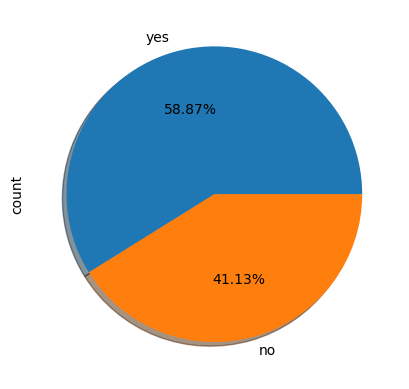

In [20]:
ln = ["yes","no"]
new_df['online_order'].value_counts().plot.pie(autopct='%1.2f%%',labels=ln,shadow=True)
plt.show()

In [21]:
new_df['book_table'].value_counts()

book_table
No     45268
Yes     6449
Name: count, dtype: int64

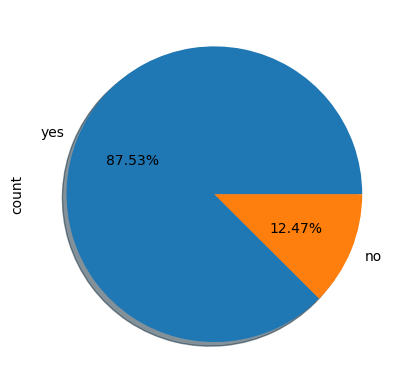

In [22]:
ln = ["yes","no"]
new_df['book_table'].value_counts().plot.pie(autopct='%1.2f%%',labels=ln,shadow=True)
plt.show()

**out of 51716 records there are 452684 resturants that is providing Resevation, while the rest 6449 don,t**

In [23]:
def resturant_rate(rates):
    if(rates=="NEW" or rates=="-"):
        return np.nan
    else:
        clean_rate = float(str(rates).split("/")[0])
        return clean_rate

In [24]:
new_df['rate'] = new_df['rate'].apply(resturant_rate)

In [41]:
top5 = new_df.groupby('location').agg({'rate':'max'}).head(5)


In [42]:
top5

,rate
location,
BTM,4.9
Banashankari,4.7
Banaswadi,4.4
Bannerghatta Road,4.6
Basavanagudi,4.8


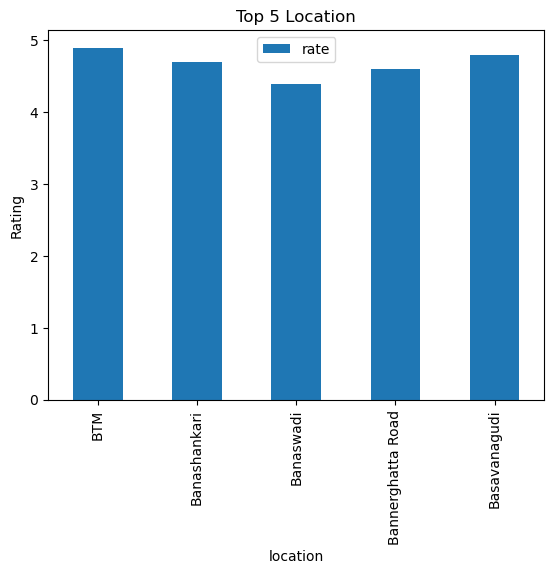

In [53]:
top5.plot(kind="bar")
plt.xlabel("location")
plt.ylabel("Rating")
plt.title("Top 5 Location")
plt.show()

In [54]:
new_df['rate'].unique()

array([4.1, 3.8, 3.7, 3.6, 4.6, 4. , 4.2, 3.9, 3.1, 3. , 3.2, 3.3, 2.8,
       4.4, 4.3, 2.9, 3.5, 2.6, 3.4, 4.5, 2.5, 2.7, 4.7, 2.4, 2.2, 2.3,
       4.8, 4.9, 2.1, 2. , 1.8])

In [44]:
new_df['rate'].mean()

3.700448817952718

In [45]:
new_df['rate'] = new_df['rate'].fillna(new_df['rate'].mean())

In [46]:
new_df['rate'].unique()

array([4.1       , 3.8       , 3.7       , 3.6       , 4.6       ,
       4.        , 4.2       , 3.9       , 3.1       , 3.        ,
       3.2       , 3.3       , 2.8       , 4.4       , 4.3       ,
       3.70044882, 2.9       , 3.5       , 2.6       , 3.4       ,
       4.5       , 2.5       , 2.7       , 4.7       , 2.4       ,
       2.2       , 2.3       , 4.8       , 4.9       , 2.1       ,
       2.        , 1.8       ])

In [47]:
round_rate = lambda x: round(x,2)

In [48]:
new_df['rate'] = new_df['rate'].apply(round_rate)

In [49]:
new_df['rate'].unique()

array([4.1, 3.8, 3.7, 3.6, 4.6, 4. , 4.2, 3.9, 3.1, 3. , 3.2, 3.3, 2.8,
       4.4, 4.3, 2.9, 3.5, 2.6, 3.4, 4.5, 2.5, 2.7, 4.7, 2.4, 2.2, 2.3,
       4.8, 4.9, 2.1, 2. , 1.8])

**Which are the Top10 resturant with highest voting**

In [50]:
new_df['name'].value_counts()

name
Cafe Coffee Day                                       96
Onesta                                                85
Just Bake                                             73
Empire Restaurant                                     71
Five Star Chicken                                     70
                                                      ..
Bangalore Kabab Palace                                 1
Kolapasi Take away                                     1
Arabian Delight                                        1
Biryani treat                                          1
Plunge  Sheraton Grand Bengaluru Whitefield Hotel      1
Name: count, Length: 8741, dtype: int64

In [52]:
top_votes = new_df.groupby("name")[["votes"]].sum().sort_values(by="votes",ascending=False).head(10)

In [56]:
top_votes

,votes
name,
Onesta,347520
Truffles,301059
Empire Restaurant,229808
Hammered,180602
The Black Pearl,172122
Meghana Foods,129557
Barbeque Nation,108425
Smallys Resto Cafe,102877
Byg Brewski Brewing Company,99531


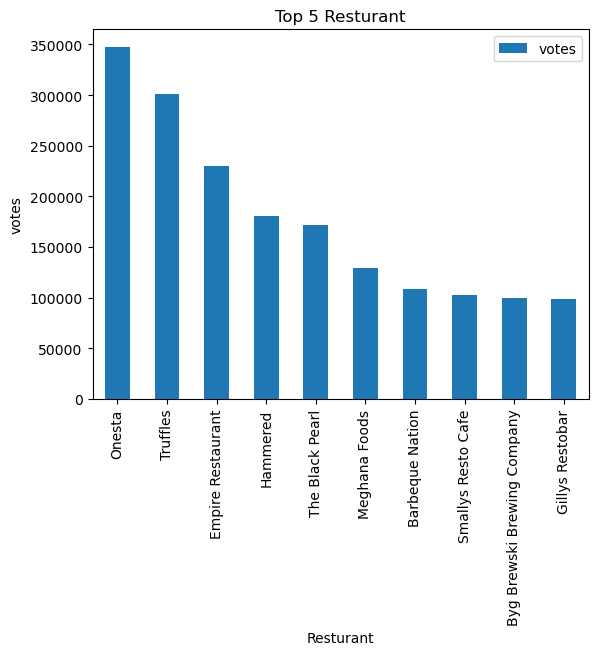

In [55]:
top_votes.plot(kind="bar")
plt.xlabel("Resturant")
plt.ylabel("votes")
plt.title("Top 5 Resturant")
plt.show()

**Onesta is the Highest vote resturant in the bengalore location**

**which are the top 10 resturant with highest cost and affordable cost**

In [58]:
new_df.columns

Index(['name', 'online_order', 'book_table', 'rate', 'votes', 'location',
       'rest_type', 'dish_liked', 'cuisines', 'approx_cost(for two people)',
       'listed_in(type)'],
      dtype='object')

In [66]:
new_df.groupby("name")[["approx_cost(for two people)"]].sum().sort_values(by="approx_cost(for two people)",ascending=False).head(10)

,approx_cost(for two people)
name,
Cafe Coffee Day,81100.0
Mainland China,74100.0
Barbeque Nation,65600.0
Toscano,60700.0
Hammered,59800.0
Banjara Melting Pot,56100.0
Sherlocks Pub,54100.0
Smoor,51100.0
Onesta,51000.0


**Top 10 highest rated cafes**

In [73]:
new_df['rest_type'].unique()

array(['Casual Dining', 'Cafe, Casual Dining', 'Quick Bites',
       'Casual Dining, Cafe', 'Cafe', 'Quick Bites, Cafe',
       'Cafe, Quick Bites', 'Delivery', 'Mess', 'Dessert Parlor',
       'Bakery, Dessert Parlor', 'Pub', 'Bakery', 'Takeaway, Delivery',
       'Fine Dining', 'Beverage Shop', 'Sweet Shop', 'Bar',
       'Beverage Shop, Quick Bites', 'Confectionery',
       'Quick Bites, Beverage Shop', 'Dessert Parlor, Sweet Shop',
       'Bakery, Quick Bites', 'Sweet Shop, Quick Bites', 'Kiosk',
       'Food Truck', 'Quick Bites, Dessert Parlor',
       'Beverage Shop, Dessert Parlor', 'Takeaway', 'Pub, Casual Dining',
       'Casual Dining, Bar', 'Dessert Parlor, Beverage Shop',
       'Quick Bites, Bakery', 'Dessert Parlor, Quick Bites',
       'Microbrewery, Casual Dining', 'Lounge', 'Bar, Casual Dining',
       'Food Court', 'Cafe, Bakery', nan, 'Dhaba',
       'Quick Bites, Sweet Shop', 'Microbrewery',
       'Food Court, Quick Bites', 'Pub, Bar', 'Casual Dining, Pub',
      

In [74]:
cafe_data = new_df[new_df['rest_type'] == "Cafe"]

In [75]:
cafe_data.groupby('name').agg({'votes':'max'}).sort_values(by='votes',ascending=False)[:10]

,votes
name,
The Hole in the Wall Cafe,7137
Dyu Art Cafe,3854
Truffles,3614
Smallys Resto Cafe,3581
Cafe Thulp,3007
A Hole Lotta Love Cafe,2874
Cafe Azzure,2747
Om Made Cafe,2738
Mr Beans Home Cafe,2717


**The Hole in the Wall Cafe	is the highest rated cafe in Bengalore location**

**Top 5 resturant for veg and non veg biryani**

In [76]:
new_df['dish_liked'].value_counts()

dish_liked
Biryani                                                                                              182
Chicken Biryani                                                                                       73
Friendly Staff                                                                                        69
Waffles                                                                                               68
Paratha                                                                                               57
                                                                                                    ... 
Butter Chicken, Shawarma Roll, Chicken Shawarama, Chicken Grill, Rolls, Al Faham Chicken, Biryani      1
Filter Coffee, Sandwich, Bonda, Vada, Masala Dosa, Salad, Aloo Curry                                   1
Burgers, Fries, Jumbo Royale Burger, Salads, Peri Peri Chicken Salad, Potato Wedges, Rolls             1
Chaat, Pav Bhaji, Raj Kachori, Buttermilk, A

**For veg biryani**

In [77]:
veg_biryani_rest = new_df[new_df['dish_liked'].isin(['Dum Biryani','Biryani'])]

In [78]:
veg_biryani_rest.groupby('name').agg({'rate':'max'}).sort_values(by='rate',ascending=False)[:5]

,rate
name,
Bhairaveshwara Military Hotel,4.2
eatfit,4.1
Andhra Kitchen,4.0
Andhra Ruchulu,4.0
Brundhavana Food Point,4.0


**Bhairaveshwara Military Hotel	is the highest rate resturant for veg biryani following by others**

**For Non-veg biryani**

In [79]:
non_veg_biryani_rest = new_df[new_df['dish_liked'].isin(['Chicken Biryani','Mutton Biryani'])]

In [80]:
non_veg_biryani_rest.groupby('name').agg({'rate':'max'}).sort_values(by='rate',ascending=False)[:5]

,rate
name,
Karahi Kitchen,4.1
Asaivam Restaurant,4.0
Anjappaar,3.9
Meghana Biriyanis,3.9
Kannur Restaurant,3.8


**Karahi Kitchen is the highest rate resturant for non-veg biryani following by others**

In [81]:
new_df.head()

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,Buffet


**Analysing the cost for two and rating of the resturant**


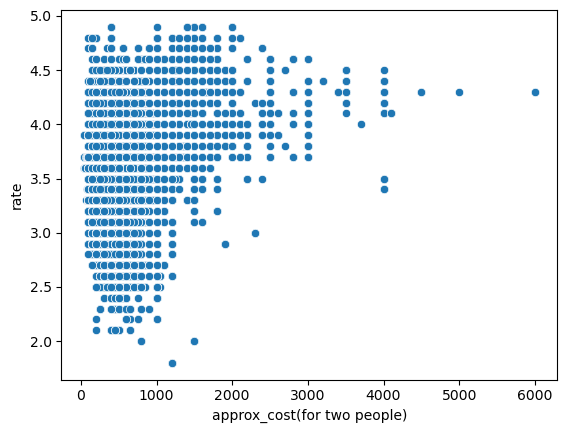

In [87]:
sns.scatterplot(x="approx_cost(for two people)",y = "rate",data = new_df)
plt.show()